In [54]:
%reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Required by Jupyter for inlining images
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [55]:
#Read data frames
Intensities_B1 = pd.read_pickle('../Data/Beam1_SPSandLHC.pkl')
BLM_B1 = pd.read_pickle('../Data/Beam1_BLM.pkl')

In [56]:
BLM_B1.describe()

,Time Stamp,Reading 1,Reading 2,Reading 3
count,1.898000e+03,1898.000000,1898.000000,1898.000000
mean,1.537150e+09,0.117479,0.131212,0.109946
std,1.675666e+06,0.132458,0.127527,0.123250
min,1.534476e+09,0.000000,0.000000,0.000000
25%,1.535796e+09,0.011825,0.024877,0.003993
50%,1.536506e+09,0.094571,0.116093,0.089513
75%,1.538614e+09,0.156472,0.185786,0.147227
max,1.540021e+09,1.000000,1.000000,1.000000


In [57]:
Intensities_B1.describe()

,Time Stamp,Time Differences,SPS Reading,LHC Reading
count,1.022000e+03,1022.000000,1.022000e+03,1.022000e+03
mean,1.536079e+09,16.875337,1.214175e+13,1.033751e+13
std,9.103123e+05,0.704729,6.653539e+12,1.677372e+13
min,1.534476e+09,14.095000,-2.358000e+10,-2.769156e+14
25%,1.535517e+09,16.529250,1.049428e+13,5.313915e+12
50%,1.535953e+09,16.890500,1.585519e+13,1.566322e+13
75%,1.536504e+09,17.246000,1.608628e+13,1.602797e+13
max,1.538122e+09,19.805000,3.042292e+13,1.659973e+13


In [58]:
#See which injection each reading corresponds to
print(Intensities_B1['Time Stamp'][0:10]-BLM_B1['Time Stamp'][0:10])

0   -0.961
1   -0.954
2   -0.967
3   -2.019
4   -0.914
5   -0.885
6    0.125
7   -0.869
8   -0.939
9   -1.874
Name: Time Stamp, dtype: float64


for i in range(0,len(Intensities_B1)):
    if abs(Intensities_B1['Time Stamp'][i]-BLM_B1['Time Stamp'][i])>5:
        print(i, ': ', Intensities_B1['Time Stamp'][i]-BLM_B1['Time Stamp'][i])

In [59]:
def sync_up(df1, df2, time_col):
    #the longer df must be df1
    for i in range(0,len(df1)):
        try:
            while abs(df1[time_col][i]-df2[time_col][i])>5:
                #drop the row and reindex
                df1 = df1.drop(i)
                df1.index = range(len(df1))
        except KeyError:
            df1 = df1[0:i]
            break
    return df1

In [60]:
df = sync_up(BLM_B1,Intensities_B1,'Time Stamp')

In [63]:
print(len(df))
print(len(Intensities_B1))
BLM_B1 = df
#Everything should be synced up now

1022
1022


In [66]:
BLM_B1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022 entries, 0 to 1021
Data columns (total 4 columns):
Time Stamp    1022 non-null float64
Reading 1     1022 non-null float64
Reading 2     1022 non-null float64
Reading 3     1022 non-null float64
dtypes: float64(4)
memory usage: 32.0 KB


In [65]:
Intensities_B1['Change in Intensities'] = Intensities_B1['LHC Reading'] - Intensities_B1['SPS Reading']

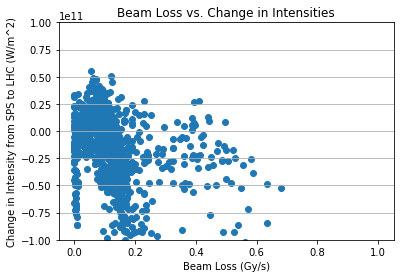

In [78]:
fig = plt.plot()
plt.scatter(BLM_B1['Reading 1'], Intensities_B1['Change in Intensities'])
plt.ylim(-10e10,10e10)#max(Intensities_B1['Change in Intensities']))
plt.title('Beam Loss vs. Change in Intensities')
plt.xlabel('Beam Loss (Gy/s)')
plt.ylabel('Change in Intensity from SPS to LHC (W/m^2)')
plt.grid(1, which ='major',axis='y')

Text(0,0.5,'Change in Intensity from SPS to LHC (W/m^2)')

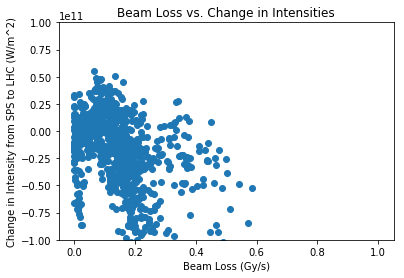

In [76]:
fig = plt.plot()
plt.scatter(BLM_B1['Reading 2'], Intensities_B1['Change in Intensities'])
plt.ylim(-10e10,10e10)#max(Intensities_B1['Change in Intensities']))
plt.title('Beam Loss vs. Change in Intensities')
plt.xlabel('Beam Loss (Gy/s)')
plt.ylabel('Change in Intensity from SPS to LHC (W/m^2)')

Text(0,0.5,'Change in Intensity from SPS to LHC (W/m^2)')

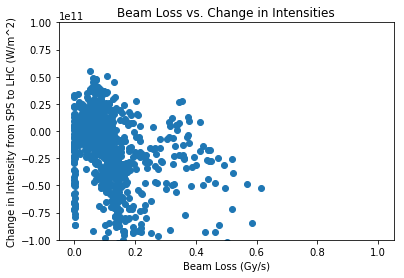

In [77]:
fig = plt.plot()
plt.scatter(BLM_B1['Reading 3'], Intensities_B1['Change in Intensities'])
plt.ylim(-10e10,10e10)#max(Intensities_B1['Change in Intensities']))
plt.title('Beam Loss vs. Change in Intensities')
plt.xlabel('Beam Loss (Gy/s)')
plt.ylabel('Change in Intensity from SPS to LHC (W/m^2)')

In [80]:
np.corrcoef(BLM_B1['Reading 1'], Intensities_B1['Change in Intensities'])

array([[1.        , 0.08899158],
       [0.08899158, 1.        ]])